In [1]:
# srcipt_coco_downloader.txt
# Contains command line script to download COCO Datasets


# Download and install COCO API

!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/api


# # Download and unzip Train 2014 Dataset

# !rm -rf /coco
# !mkdir /coco
# !rm /content/train.zip
# !rm /content/annotations.zip

# !wget http://images.cocodataset.org/zips/train2014.zip
# !unzip train2014.zip -d /coco
# !mv /coco/train2014 /coco/train
# !rm /content/train2014.zip

# !wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
# !unzip annotations_trainval2014.zip -d /coco 
# !rm /content/annotations_trainval2014.zip


# Download and unzip Validation 2017 Dataset 

!rm -rf /coco
!mkdir /coco
!rm /content/val.zip
!rm /content/annotations.zip

!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d /coco
!mv /coco/val2017 /coco/val
!rm /content/val2017.zip

!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d /coco 
!rm /content/annotations_trainval2017.zip

!mv /coco /content/coco

Cloning into 'cocoapi'...
remote: Enumerating objects: 947, done.
remote: Total 947 (delta 0), reused 0 (delta 0), pack-reused 947
Receiving objects: 100% (947/947), 11.69 MiB | 33.62 MiB/s, done.
Resolving deltas: 100% (565/565), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages

In [0]:
# Load dependencies

import torch

from data_loader import *
from visualizer import *
from extractNet_simple import *
from metrics import *
from trainer import *

In [3]:
# Load and clean datasets

cocoData = loadData()

supCatInterest = ['person', 'vehicle', 'animal']
imgDict, annDict = generateSelImgDict(cocoData, supCatInterest)

dataset = dataParseProminent(cocoData, imgDict, annDict, 50, just_resize=True, toTensor=True)
train_set = dataset[:40]
val_set = dataset[40:]

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=False)

loading annotations into memory...
Done (t=0.70s)
creating index...
index created!


Epoch:0, Train IoU:0.4062, Train Loss:1.0976|Valid IoU:0.3874, Valid Loss:1.4030
Epoch:1, Train IoU:0.3946, Train Loss:0.5352|Valid IoU:0.3791, Valid Loss:0.6745
Epoch:2, Train IoU:0.3456, Train Loss:0.1917|Valid IoU:0.3331, Valid Loss:0.2325
Epoch:3, Train IoU:0.3363, Train Loss:0.1745|Valid IoU:0.3243, Valid Loss:0.2085
Epoch:4, Train IoU:0.3360, Train Loss:0.1746|Valid IoU:0.3240, Valid Loss:0.2084
Epoch:5, Train IoU:0.3362, Train Loss:0.1744|Valid IoU:0.3242, Valid Loss:0.2082
Epoch:6, Train IoU:0.3364, Train Loss:0.1743|Valid IoU:0.3244, Valid Loss:0.2081
Epoch:7, Train IoU:0.3367, Train Loss:0.1742|Valid IoU:0.3246, Valid Loss:0.2081
Epoch:8, Train IoU:0.3370, Train Loss:0.1741|Valid IoU:0.3249, Valid Loss:0.2080
Epoch:9, Train IoU:0.3372, Train Loss:0.1740|Valid IoU:0.3251, Valid Loss:0.2079
Epoch:10, Train IoU:0.3375, Train Loss:0.1739|Valid IoU:0.3253, Valid Loss:0.2079
Epoch:11, Train IoU:0.3377, Train Loss:0.1739|Valid IoU:0.3255, Valid Loss:0.2078
Epoch:12, Train IoU:0.3379

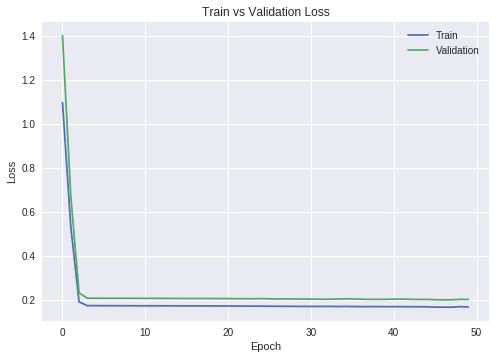

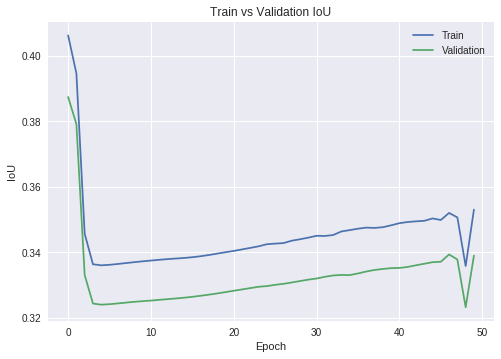

In [4]:
# Train model

net = extractNet_simple()
trainModel(net, train_set, val_set, batch_size=32, num_epochs=50, checkpoint=False)